<a href="https://colab.research.google.com/github/binodmathews93/ML-Projects/blob/master/hacklive4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import files
files.upload()

Saving SampleSubmission_ZxsCq0O.csv to SampleSubmission_ZxsCq0O.csv


{'SampleSubmission_ZxsCq0O.csv': b'ID,Close\r\nid_713,85\r\nid_714,85\r\nid_715,85\r\nid_716,85\r\nid_717,85\r\nid_718,85\r\nid_719,85\r\nid_720,85\r\nid_721,85\r\nid_722,85\r\nid_723,85\r\nid_724,85\r\nid_725,85\r\nid_726,85\r\nid_727,85\r\nid_728,85\r\nid_729,85\r\nid_730,85\r\nid_731,85\r\nid_732,85\r\nid_733,85\r\nid_734,85\r\nid_735,85\r\nid_736,85\r\nid_737,85\r\nid_738,85\r\nid_739,85\r\nid_740,85\r\nid_741,85\r\nid_742,85\r\nid_743,85\r\nid_744,85\r\nid_745,85\r\nid_746,85\r\nid_747,85\r\nid_748,85\r\nid_749,85\r\nid_750,85\r\nid_751,85\r\nid_752,85\r\nid_753,85\r\nid_1467,85\r\nid_1468,85\r\nid_1469,85\r\nid_1470,85\r\nid_1471,85\r\nid_1472,85\r\nid_1473,85\r\nid_1474,85\r\nid_1475,85\r\nid_1476,85\r\nid_1477,85\r\nid_1478,85\r\nid_1479,85\r\nid_1480,85\r\nid_1481,85\r\nid_1482,85\r\nid_1483,85\r\nid_1484,85\r\nid_1485,85\r\nid_1486,85\r\nid_1487,85\r\nid_1488,85\r\nid_1489,85\r\nid_1490,85\r\nid_1491,85\r\nid_1492,85\r\nid_1493,85\r\nid_1494,85\r\nid_1495,85\r\nid_1496,85\r\n

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [30]:
train = pd.read_csv('/content/Train_awoL0xl.csv')
test = pd.read_csv('/content/Test_QQKW4dv.csv')
ss = pd.read_csv('/content/SampleSubmission_ZxsCq0O.csv')

In [4]:
train.head(3)
test.head(3)

,ID,stock,Date,Open,High,Low,Close,holiday,unpredictability_score
0,id_0,0,2017-01-03,82.9961,82.7396,82.9144,82.8101,1,7
1,id_1,0,2017-01-04,83.1312,83.1669,83.3779,82.9690,0,7
2,id_2,0,2017-01-05,82.6622,82.7634,82.8984,82.8578,0,7


,ID,stock,Date,holiday,unpredictability_score
0,id_713,0,2019-11-01,0,7
1,id_714,0,2019-11-04,0,7
2,id_715,0,2019-11-05,0,7


In [5]:
ID_COL, TARGET_COL = 'id', 'Close'

In [6]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')

features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 73439 samples and 9 variables

Test contains 4223 samples and 5 variables

The dataset contains 8 features


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73439 entries, 0 to 73438
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      73439 non-null  object 
 1   stock                   73439 non-null  int64  
 2   Date                    73439 non-null  object 
 3   Open                    73439 non-null  float64
 4   High                    73439 non-null  float64
 5   Low                     73439 non-null  float64
 6   Close                   73439 non-null  float64
 7   holiday                 73439 non-null  int64  
 8   unpredictability_score  73439 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 5.0+ MB


In [8]:
train.nunique()

ID                        73439
stock                     103  
Date                      713  
Open                      60702
High                      60594
Low                       61015
Close                     60352
holiday                   2    
unpredictability_score    10   
dtype: int64

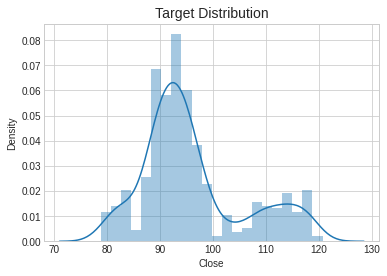

In [9]:
fltr = train['stock'] == 0
_ = sns.distplot(train[fltr][TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

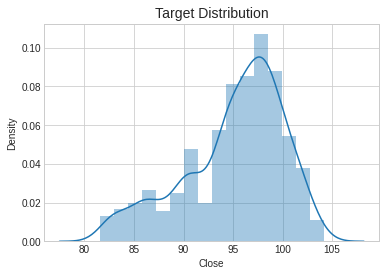

In [10]:
fltr = train['stock'] == 57
_ = sns.distplot(train[fltr][TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

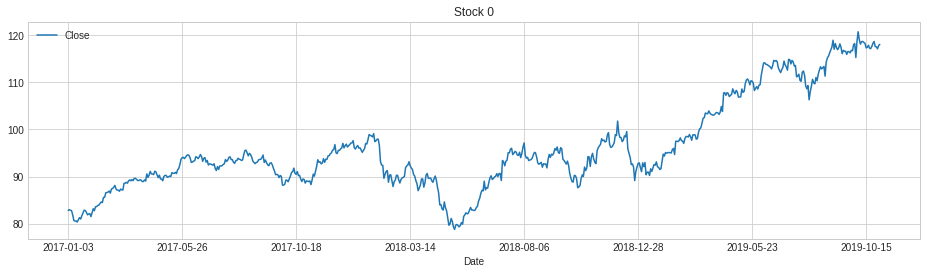

In [11]:
STOCK_NO = 0
fltr = train['stock'] == STOCK_NO
_ = train[fltr].set_index('Date')[['Close']].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}')

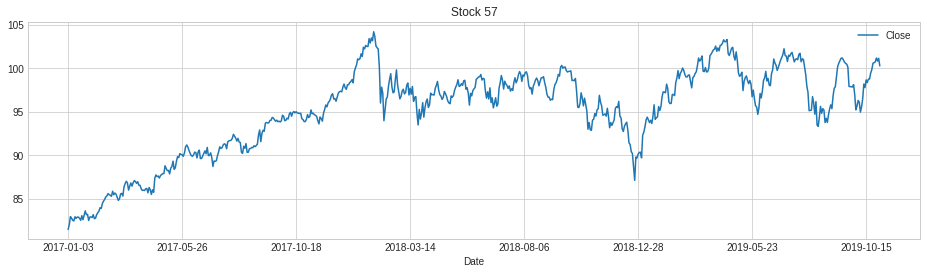

In [13]:
STOCK_NO = 57
fltr = train['stock'] == STOCK_NO
_ = train[fltr].set_index('Date')[['Close']].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}')

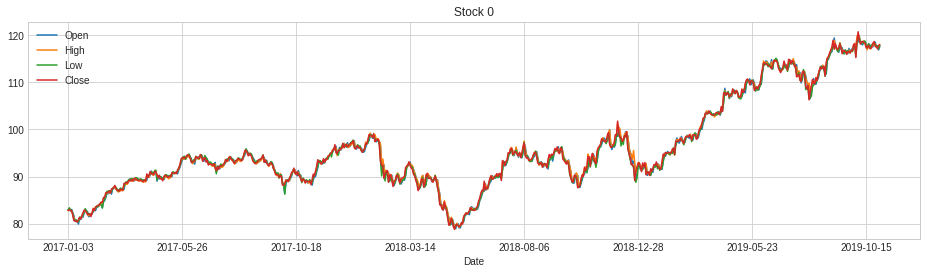

In [14]:
STOCK_NO = 0
fltr = train['stock'] == STOCK_NO
_ = train[fltr].set_index('Date')[['Open', 'High', 'Low', 'Close']].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}')

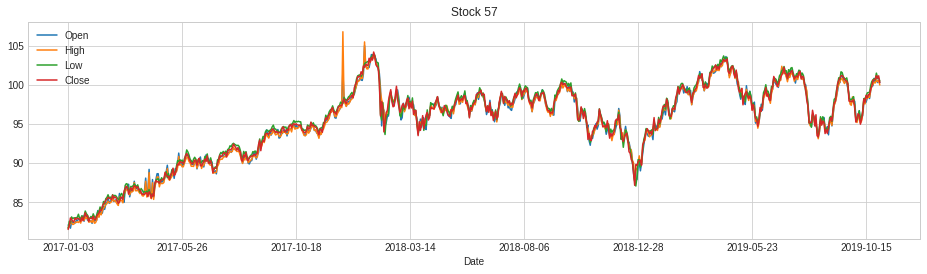

In [15]:
STOCK_NO = 57
fltr = train['stock'] == STOCK_NO
_ = train[fltr].set_index('Date')[['Open', 'High', 'Low', 'Close']].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}')

In [16]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
  return mean_squared_error(y_true, y_pred) ** 0.5

In [27]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

###LightGBM Model

In [32]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)

In [33]:
df['Date'] = pd.to_datetime(df["Date"])

In [34]:
for attr in ['year', 'month', 'day', 'week', 'dayofweek']:
  df[attr] = getattr(df['Date'].dt, attr)

In [35]:
features = ['holiday','unpredictability_score', 'year', 'month', 'day', 'week', 'dayofweek']

In [36]:
train, test = df[:train.shape[0]].reset_index(drop = True), df[train.shape[0]:].reset_index(drop = True)

In [37]:
LAST_TRAINING_DAY = train['Date'].max()
DAYS_TO_VALIDATE = pd.Timedelta(days = 60)
VAL_FIRST_DAY = LAST_TRAINING_DAY - DAYS_TO_VALIDATE
LAST_TRAINING_DAY - VAL_FIRST_DAY

Timedelta('60 days 00:00:00')

In [38]:
val_fltr = train['Date'] >= VAL_FIRST_DAY
trn, val = train[~val_fltr].reset_index(drop = True), train[val_fltr].reset_index(drop = True)

In [39]:
features = ['stock', 'holiday', 'unpredictability_score', 'year', 'month', 'day', 'week', 'dayofweek']

In [40]:
from lightgbm import LGBMRegressor
clf = LGBMRegressor(n_estimators=1000)
clf.fit(trn[features], trn['Close'], eval_set = [(val[features], val[TARGET_COL])], verbose = 50, early_stopping_rounds=200, eval_metric='rmse')

Training until validation scores don't improve for 200 rounds.
[50]	valid_0's l2: 63.5488	valid_0's rmse: 7.97175
[100]	valid_0's l2: 39.1271	valid_0's rmse: 6.25517
[150]	valid_0's l2: 32.8116	valid_0's rmse: 5.72815
[200]	valid_0's l2: 31.418	valid_0's rmse: 5.60517
[250]	valid_0's l2: 31.2352	valid_0's rmse: 5.58885
[300]	valid_0's l2: 31.0007	valid_0's rmse: 5.56782
[350]	valid_0's l2: 30.6634	valid_0's rmse: 5.53745
[400]	valid_0's l2: 30.5183	valid_0's rmse: 5.52433
[450]	valid_0's l2: 30.1569	valid_0's rmse: 5.49153
[500]	valid_0's l2: 30.3103	valid_0's rmse: 5.50548
[550]	valid_0's l2: 31.015	valid_0's rmse: 5.56911
[600]	valid_0's l2: 31.1376	valid_0's rmse: 5.58011
[650]	valid_0's l2: 31.2653	valid_0's rmse: 5.59154
Early stopping, best iteration is:
[467]	valid_0's l2: 30.0933	valid_0's rmse: 5.48574


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [41]:
pt = clf.predict(test[features])
download_preds(pt, 'lightgbm_base.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
pd.read_csv('lightgbm_base.csv')

,ID,Close
0,id_713,108.209395
1,id_714,108.868592
2,id_715,109.518260
3,id_716,109.531761
4,id_717,109.504771
...,...,...
4218,id_77657,125.514855
4219,id_77658,125.480711
4220,id_77659,125.339028
4221,id_77660,131.159280


In [44]:
preds_test_df = test.copy()
preds_test_df['Close'] = pt

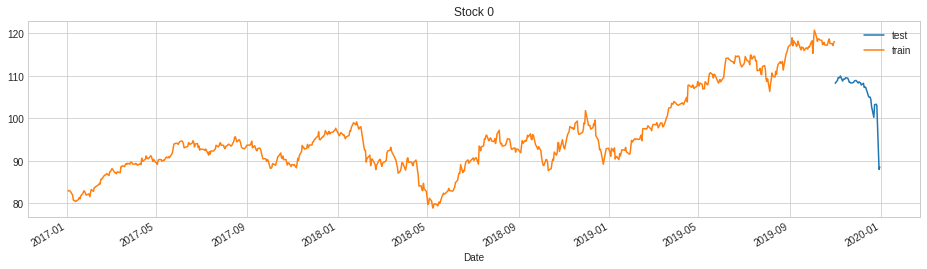

In [45]:
STOCK_NO = 0
train_fltr = train['stock'] == STOCK_NO
train_tmp = train[train_fltr].set_index('Date')[['Close']]
train_tmp['type'] = 'train'
test_fltr = preds_test_df['stock'] == STOCK_NO
test_tmp = preds_test_df[test_fltr].set_index('Date')[['Close']]
test_tmp['type'] = 'test'
_ = train_tmp.append(test_tmp).groupby('type')['Close'].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}', sharex=False)
_ = plt.legend()

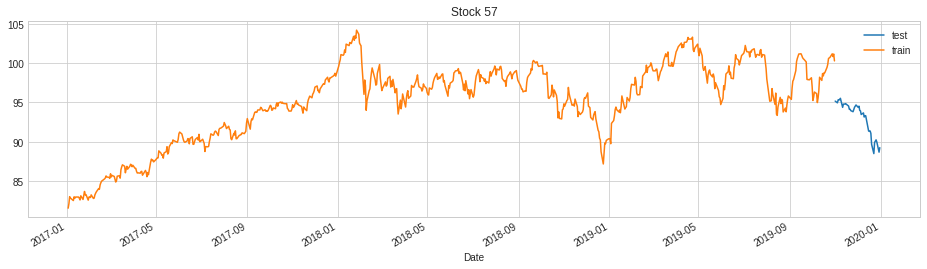

In [46]:
STOCK_NO = 57
train_fltr = train['stock'] == STOCK_NO
train_tmp = train[train_fltr].set_index('Date')[['Close']]
train_tmp['type'] = 'train'
test_fltr = preds_test_df['stock'] == STOCK_NO
test_tmp = preds_test_df[test_fltr].set_index('Date')[['Close']]
test_tmp['type'] = 'test'
_ = train_tmp.append(test_tmp).groupby('type')['Close'].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}', sharex=False)
_ = plt.legend()